# Kaggle: Santander Customer Transaction Prediction
Dataset: https://www.kaggle.com/competitions/walmart-recruiting-store-sales-forecasting

## Step1 定義問題
- 這個問題是如何產生的？這個問題的預期產出是什麼？預測每個商店每個部門的每週銷售額
- 它提供了哪些資訊、資料與變數？商店的類型和規模、是否為特殊假期週、消費者物價指數、失業率等
- 會對這個問題可以產生什麼結果？瞭解銷售情況來做進一步的對策

### 選擇什麼方法？
- 該問題是監督還是非監督學習？監督式學習
- 該問題的結果是分類還是回歸？回歸問題

## Step2 區分與整理 Train／Test 資料集

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
stores = pd.read_csv("stores.csv")
print(stores.shape)
stores.head()

(45, 3)


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [3]:
train = pd.read_csv("train.csv")
print(train.shape)
train.head()

(421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
test = pd.read_csv("test.csv")
print(test.shape)
test.head()

(115064, 4)


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [5]:
features = pd.read_csv("features.csv")
print(features.shape)
features.head()

(8190, 12)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


## Step3 進行探索式資料分析(EDA)
### A. 確認資料狀況

In [6]:
df_train = train.merge(features, on=["Store", "Date", "IsHoliday"], how = "inner").merge(stores, on=["Store"], how="inner")
print(df_train.shape)
df_train.head()

(421570, 16)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [7]:
df_test = test.merge(features, on=["Store", "Date", "IsHoliday"], how = "inner").merge(stores, on=["Store"], how="inner")
print(df_test.shape)
df_test.head()

(115064, 15)


,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         115064 non-null  int64  
 1   Dept          115064 non-null  int64  
 2   Date          115064 non-null  object 
 3   IsHoliday     115064 non-null  bool   
 4   Temperature   115064 non-null  float64
 5   Fuel_Price    115064 non-null  float64
 6   MarkDown1     114915 non-null  float64
 7   MarkDown2     86437 non-null   float64
 8   MarkDown3     105235 non-null  float64
 9   MarkDown4     102176 non-null  float64
 10  MarkDown5     115064 non-null  float64
 11  CPI           76902 non-null   float64
 12  Unemployment  76902 non-null   float64
 13  Type          115064 non-null  object 
 14  Size          115064 non-null  int64  
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 13.3+ MB


In [10]:
# 檢查缺失值
def na_check(df_data):
    data_na = (df_data.isnull().sum() / len(df_data)) * 100
    data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({"Missing Ratio" : data_na})
    display(missing_data)
na_check(df_train)
na_check(df_test)

,Missing Ratio
MarkDown2,73.611025
MarkDown4,67.984676
MarkDown3,67.480845
MarkDown1,64.257181
MarkDown5,64.079038


,Missing Ratio
CPI,33.165890
Unemployment,33.165890
MarkDown2,24.879198
MarkDown4,11.200723
MarkDown3,8.542203
MarkDown1,0.129493


### B. 樞紐分析與視覺化

In [11]:
# Split data information for train dataset
df_train["Date"] = pd.to_datetime(df_train["Date"], format="%Y-%m-%d")
df_train["Year"] = df_train["Date"].dt.year
df_train["Month"] = df_train["Date"].dt.month
# df_train["Day"] = df_train["Date"].dt.day
df_train["Week"] = df_train["Date"].dt.isocalendar().week
df_train = df_train.drop("Date", axis=1)
print(df_train.shape)
df_train.head()

(421570, 18)


,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week
0,1,1,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5
1,1,2,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5
2,1,3,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5
3,1,4,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5
4,1,5,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5


In [12]:
# Split data information for test dataset
df_test["Date"] = pd.to_datetime(df_test["Date"], format="%Y-%m-%d")
df_test["Year"] = df_test["Date"].dt.year
df_test["Month"] = df_test["Date"].dt.month
# df_test["Day"] = df_test["Date"].dt.day
df_test["Week"] = df_test["Date"].dt.isocalendar().week
df_test = df_test.drop("Date", axis=1)
print(df_test.shape)
df_test.head()

(115064, 17)


,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week
0,1,1,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,2012,11,44
1,1,2,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,2012,11,44
2,1,3,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,2012,11,44
3,1,4,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,2012,11,44
4,1,5,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,2012,11,44


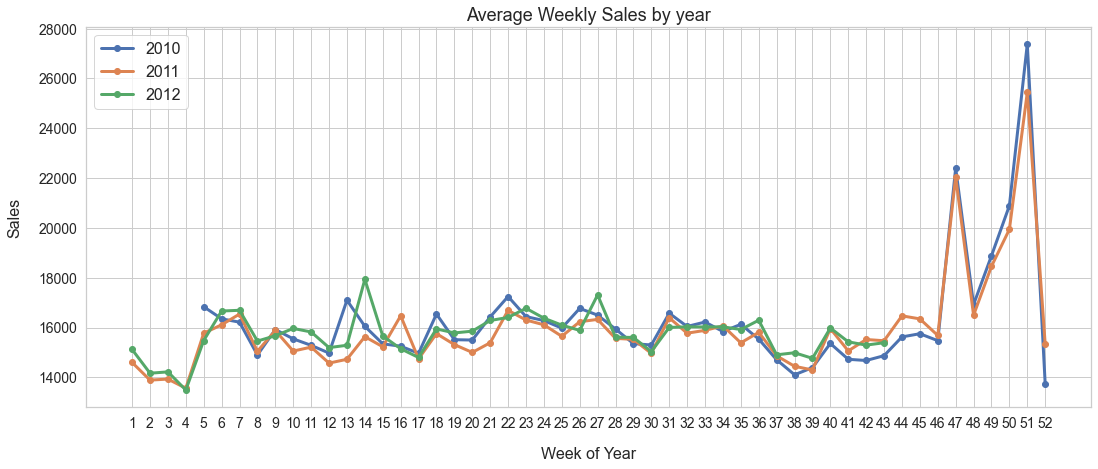

In [13]:
# Sales analysis by week and year
weekly_sales_2010 = df_train[df_train["Year"]==2010].groupby("Week")["Weekly_Sales"].mean()
weekly_sales_2011 = df_train[df_train["Year"]==2011].groupby("Week")["Weekly_Sales"].mean()
weekly_sales_2012 = df_train[df_train["Year"]==2012].groupby("Week")["Weekly_Sales"].mean()

sns.set(style="whitegrid")
plt.figure(figsize=(18,7))
plt.plot(weekly_sales_2010.index, weekly_sales_2010.values, linewidth=3.0, marker="o", ms=6)
plt.plot(weekly_sales_2011.index, weekly_sales_2011.values, linewidth=3.0, marker="o", ms=6)
plt.plot(weekly_sales_2012.index, weekly_sales_2012.values, linewidth=3.0, marker="o", ms=6)

plt.xticks(np.arange(1, 53), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Week of Year", fontsize=16, labelpad=16)
plt.ylabel("Sales", fontsize=16, labelpad=16)
plt.title("Average Weekly Sales by year", fontsize=18)
plt.legend(["2010", "2011", "2012"], fontsize=16)
plt.show()

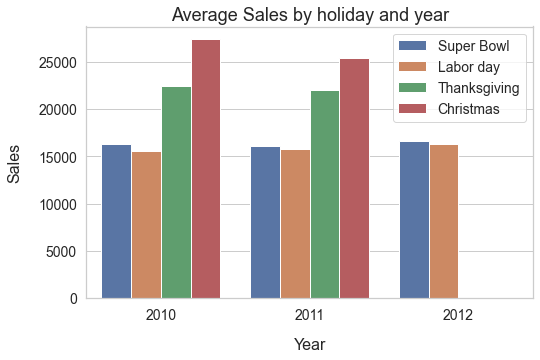

In [14]:
# Sales analysis by holiday and year
holiday = {6:"Super Bowl", 36:"Labor day", 47:"Thanksgiving", 51:"Christmas"}
df_holiday = df_train[df_train["Week"].isin([6,36,47,51])]
holiday_sales = df_holiday.groupby(["Year","Week"])["Weekly_Sales"].mean().reset_index()
holiday_sales = holiday_sales.rename(columns={"Week":"Holiday"})
holiday_sales["Holiday"] = holiday_sales["Holiday"].map(holiday)
holiday_sales

plt.figure(figsize=(8,5))
sns.barplot(x="Year", y="Weekly_Sales", hue="Holiday", data=holiday_sales)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year", fontsize=16, labelpad=16)
plt.ylabel("Sales", fontsize=16, labelpad=16)
plt.title("Average Sales by holiday and year", fontsize=18)
plt.legend(fontsize=14)
plt.show()

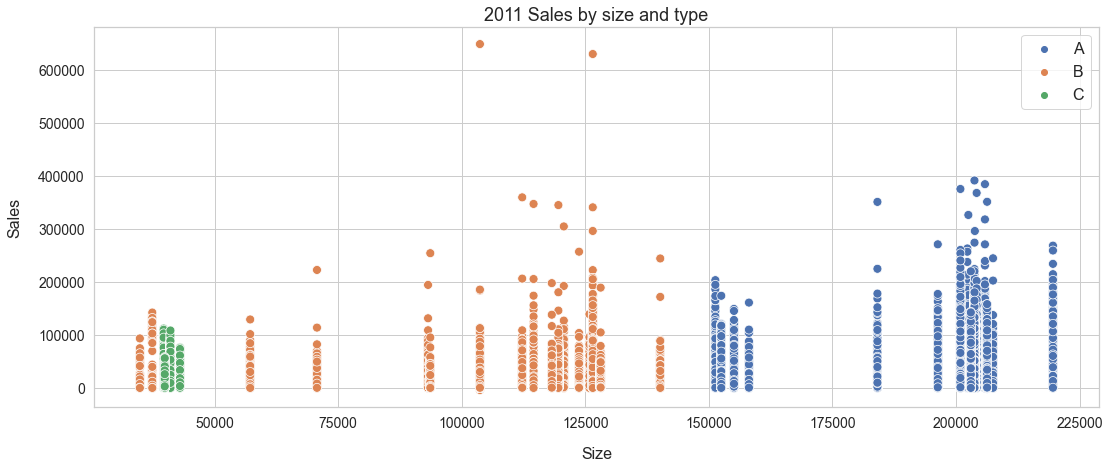

In [15]:
# Sales analysis by size and type
plt.figure(figsize=(18,7))
sales_2011 = df_train[df_train["Year"]==2011]

sns.scatterplot(x=sales_2011["Size"], y=sales_2011["Weekly_Sales"], hue=sales_2011["Type"], s=80)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Size", fontsize=16, labelpad=16)
plt.ylabel("Sales", fontsize=16, labelpad=16)
plt.title("2011 Sales by size and type", fontsize=18)
plt.legend(fontsize=16)
plt.show()

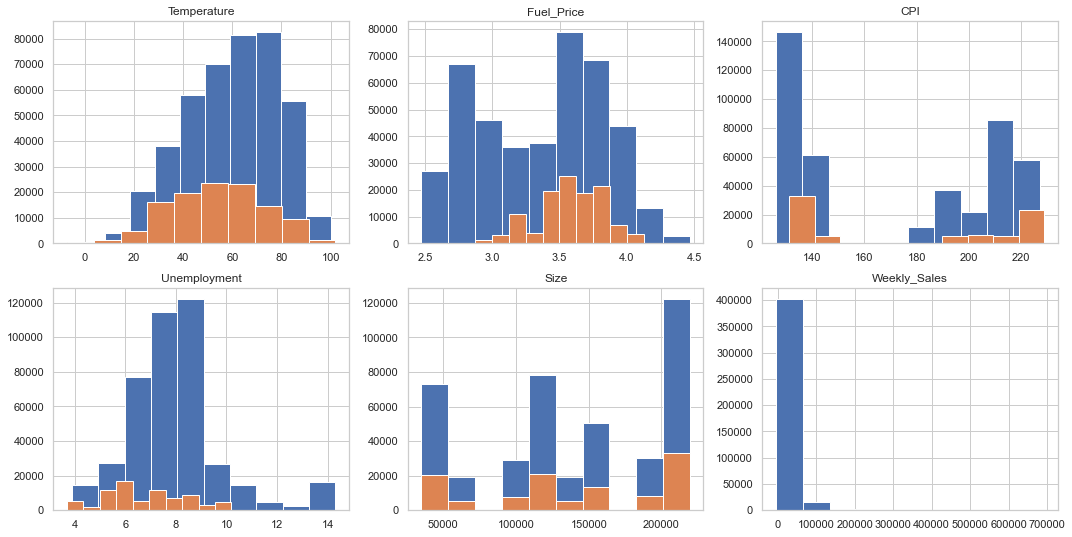

In [16]:
# Check features distribution
items = ["Temperature","Fuel_Price","CPI","Unemployment","Size","Weekly_Sales"]
plt.figure(figsize=(18,9))
for i in range(len(items)):
    plt.subplot(2,3,i+1)
    plt.hist(df_train[items[i]],color=sns.color_palette()[0])
    plt.title(str(items[i]))
for i in range(len(items)-1):
    plt.subplot(2,3,i+1)
    plt.hist(df_test[items[i]],color=sns.color_palette()[1])
    plt.title(str(items[i]))
plt.show()

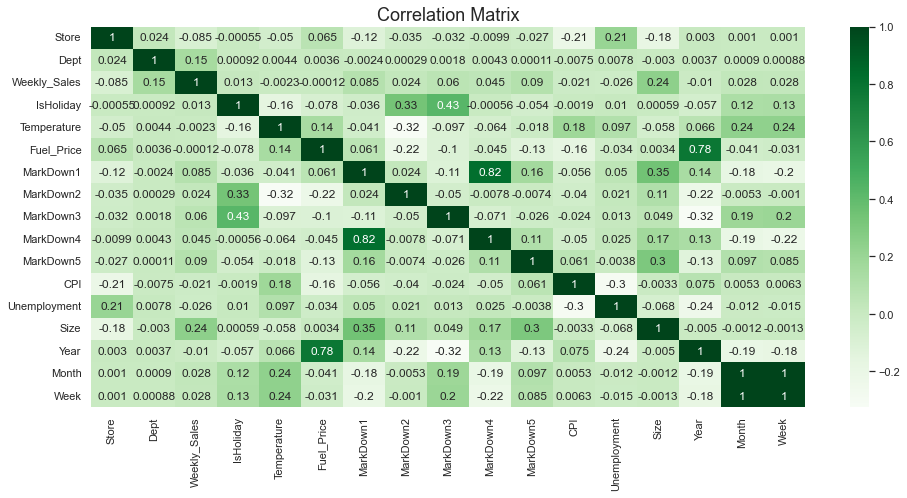

In [17]:
plt.figure(figsize=(16,7))
sns.heatmap(df_train.corr(), cmap="Greens", annot=True)
plt.title("Correlation Matrix", fontsize=18)
plt.show()

## Step4 清理資料

### A. 檢查資料與確認缺失值
1. 是否有遺漏值/缺失值 (Missing value)   
   Training Dataset 中 MarkDown1~5 欄位缺失值很多, Testing Dataset 中 CPI, Unemployment 也有約1/3的缺失值
2. 是否有極值或異常值 (Outlier)  
   從分布圖來看, Weekly_Sales 有極值
3. 資料分布是否符合常態 (Normal Distribution)  
   Features 不太符合常態分布
4. 資料是否需要清洗 (Clean Data)  
   Yes, 如下方清單
   
### B. 進行資料加工
待辦清單
1. (Train/Test) 移除缺失值太多的欄位 MarkDown1~5, CPI, Unemployment
2. (Train/Test) 移除與Weekly_Sales correlation 較低的欄位Temperature, Fuel_Price 以及 Month(與Week correlation=1)
3. (Train/Test) IsHoliday, Type 欄位轉換成數字形式
4. 完成後, 確認缺失值與目前的資料表內容

In [18]:
# 1. (Train/Test) 移除缺失值太多的欄位 MarkDown1~5, CPI, Unemployment
# 2. (Train/Test) 移除與Weekly_Sales correlation 較低的欄位Temperature, Fuel_Price 以及 Month(與Week correlation=1)
df_train = df_train.drop(["Temperature","Fuel_Price","MarkDown1","MarkDown2","MarkDown3","MarkDown4",
                          "MarkDown5","CPI", "Unemployment","Month"],axis=1)
df_test = df_test.drop(["Temperature","Fuel_Price","MarkDown1","MarkDown2","MarkDown3","MarkDown4",
                        "MarkDown5","CPI", "Unemployment","Month"],axis=1)

In [19]:
# 3. (Train/Test) IsHoliday, Type 欄位轉換成數字形式
df_train["IsHoliday"] = df_train["IsHoliday"].astype(int)
df_test["IsHoliday"] = df_test["IsHoliday"].astype(int)
types = {"A":1,"B":2,"C":3}
df_train["Type"] = df_train["Type"].replace(types)
df_test["Type"] = df_test["Type"].replace(types)

In [20]:
# 4. 完成後, 確認缺失值與目前的資料表內容
na_check(df_train)
print(df_train.shape)
df_train.head()

,Missing Ratio


(421570, 8)


,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Year,Week
0,1,1,24924.50,0,1,151315,2010,5
1,1,2,50605.27,0,1,151315,2010,5
2,1,3,13740.12,0,1,151315,2010,5
3,1,4,39954.04,0,1,151315,2010,5
4,1,5,32229.38,0,1,151315,2010,5


In [21]:
# 4. 完成後, 確認缺失值與目前的資料表內容
na_check(df_test)
print(df_test.shape)
df_test.head()

,Missing Ratio


(115064, 7)


,Store,Dept,IsHoliday,Type,Size,Year,Week
0,1,1,0,1,151315,2012,44
1,1,2,0,1,151315,2012,44
2,1,3,0,1,151315,2012,44
3,1,4,0,1,151315,2012,44
4,1,5,0,1,151315,2012,44


## Step5 模型建置與預測

### A. 特徵預處理 (Preprocessing)
1. 先將特徵矩陣（自變數）與應變數區分出來
2. 使用StandardScaler進行處理特徵矩陣

In [22]:
# 1. 先將特徵矩陣（自變數）與應變數區分出來
train_Y = df_train["Weekly_Sales"]
train_X = df_train.drop(["Weekly_Sales"], axis=1)
test_X = df_test

In [23]:
# 2. 使用StandardScaler進行處理特徵矩陣
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = StandardScaler().fit(train_X)
train_X = pd.DataFrame(scaler.transform(train_X), columns=train_X.columns)
test_X = pd.DataFrame(scaler.transform(test_X), columns=test_X.columns)

### B. 準備訓練／測試集 (Train / Test Split)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.3, random_state=10)

### C. 訓練與評估模型 (Model Training)
使用default參數、設定random_state=10做預測

1. Linear Regression
2. Decision Tree
3. Random Forest
4. XGBoost
5. LightGBM

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error

In [26]:
# WAME definition
def WMAE(data, prediction, actual):
    weights = data["IsHoliday"].apply(lambda x: 5 if x==1 else 1)
    return np.round(np.sum(weights*abs(prediction-actual))/weights.sum(),3)

### 1. Linear Regression

In [27]:
# 使用default參數預測
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Linear Regression WMAE: %.3f" % WMAE(X_test, y_pred, y_test))

Linear Regression WMAE: 14596.903


### 2. Decision Tree

In [28]:
# 使用default參數預測
dt = DecisionTreeRegressor(random_state=10)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Decision Tree WMAE: %.3f" % WMAE(X_test, y_pred, y_test))

Decision Tree WMAE: 1693.189


In [29]:
# 調整參數
max_depths = list(range(1,21))
min_samples_splits = list(range(1,21))
min_samples_leaves = list(range(1,21))
param_grid = {"max_depth":max_depths,"min_samples_split":min_samples_splits, "min_samples_leaf":min_samples_leaves}

dt_rscv = RandomizedSearchCV(dt, param_grid, scoring="neg_mean_absolute_error", random_state=10, n_jobs=-1)
search_result = dt_rscv.fit(X_train, y_train)
print("Best Score: %.3f using %s" % (abs(search_result.best_score_), search_result.best_params_))

Best Score: 1780.088 using {'min_samples_split': 12, 'min_samples_leaf': 5, 'max_depth': 19}


In [30]:
dt_bestparam = dt_rscv.best_estimator_
dt_bestparam.fit(X_train, y_train)
y_pred = dt_bestparam.predict(X_test)
print("Decision Tree WMAE: %.3f" % WMAE(X_test, y_pred, y_test))

Decision Tree WMAE: 1698.848


In [31]:
dt_pred = dt_bestparam.predict(test_X)
sub = pd.DataFrame()
sub["Id"] = test["Store"].astype(str) + "_" + test["Dept"].astype(str) + "_" + test["Date"]
sub["Weekly_Sales"] = dt_pred
sub.to_csv("submission_dt.csv", index=False)

### 3. Random Forest

In [32]:
# 使用default參數預測
rf = RandomForestRegressor(random_state=10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Random Forest WMAE: %.3f" % WMAE(X_test, y_pred, y_test))

Random Forest WMAE: 1367.289


In [33]:
# 調整參數
n_estimators = list(range(5,105,5))
max_depths = list(range(1,21))
min_samples_splits = list(range(1,21))
min_samples_leaves = list(range(1,21))
param_grid = {"n_estimators":n_estimators,"max_depth":max_depths,
              "min_samples_split":min_samples_splits,"min_samples_leaf":min_samples_leaves}

rf_rscv = RandomizedSearchCV(rf, param_grid, scoring="neg_mean_absolute_error", random_state=10, n_jobs=-1)
search_result = rf_rscv.fit(X_train, y_train)
print("Best Score: %.3f using %s" % (abs(search_result.best_score_), search_result.best_params_))

Best Score: 1890.306 using {'n_estimators': 70, 'min_samples_split': 4, 'min_samples_leaf': 14, 'max_depth': 18}


In [34]:
rf_bestparam = rf_rscv.best_estimator_
rf_bestparam.fit(X_train, y_train)
y_pred = rf_bestparam.predict(X_test)
print("Random Forest WMAE: %.3f" % WMAE(X_test, y_pred, y_test))

Random Forest WMAE: 1824.868


In [36]:
rf_pred = rf_bestparam.predict(test_X)
sub1 = pd.DataFrame()
sub1["Id"] = sub["Id"]
sub1["Weekly_Sales"] = rf_pred
sub1.to_csv("submission_rf.csv", index=False)

### 4. XGBoost

In [37]:
# 使用default參數預測
xgb = XGBRegressor(random_state=10)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
print("XGBoost WMAE: %.3f" % WMAE(X_test, y_pred, y_test))

XGBoost WMAE: 2940.043


In [39]:
n_estimators = list(range(5,105,5))
max_depths = list(range(1,21))
subsample = list(np.arange(0.05, 1.05, 0.05)) # Subsample ratio of the training instance
colsample_bytree = list(np.arange(0.05, 1.05, 0.05)) # Subsample ratio of columns when constructing each tree
param_grid = {"n_estimators":n_estimators,"max_depth":max_depths,
              "subsample":subsample,"colsample_bytree":colsample_bytree}

xgb_rscv = RandomizedSearchCV(xgb, param_grid, scoring="neg_mean_absolute_error", random_state=10, n_jobs=-1)
search_result = xgb_rscv.fit(X_train, y_train)
print("Best Score: %.3f using %s" % (abs(search_result.best_score_), search_result.best_params_))

Best Score: 1387.592 using {'subsample': 0.8, 'n_estimators': 85, 'max_depth': 17, 'colsample_bytree': 0.6000000000000001}


In [40]:
xgb_bestparam = xgb_rscv.best_estimator_
xgb_bestparam.fit(X_train, y_train)
y_pred = xgb_bestparam.predict(X_test)
print("XGBoost WMAE: %.3f" % WMAE(X_test, y_pred, y_test))

XGBoost WMAE: 1218.215


In [41]:
xgb_pred = xgb_bestparam.predict(test_X)
sub2 = pd.DataFrame()
sub2["Id"] = sub["Id"]
sub2["Weekly_Sales"] = xgb_pred
sub2.to_csv("submission_xgb.csv", index=False)

### 5. LightGBM

In [42]:
lgbm = LGBMRegressor(random_state=10)
lgbm.fit(X_train,y_train)
y_pred = lgbm.predict(X_test)
print("LightGBM WMAE: %.3f" % WMAE(X_test, y_pred, y_test))

LightGBM WMAE: 4095.227


In [43]:
# 調整參數
n_estimators = list(range(5,105,5))
max_depths = list(range(1,21))
subsample = list(np.arange(0.05, 1.05, 0.05)) # Subsample ratio of the training instance
colsample_bytree = list(np.arange(0.05, 1.05, 0.05)) # Subsample ratio of columns when constructing each tree
param_grid = {"n_estimators":n_estimators,"max_depth":max_depths,
              "subsample":subsample,"colsample_bytree":colsample_bytree}

lgbm_rscv = RandomizedSearchCV(lgbm, param_grid, scoring="neg_mean_absolute_error", random_state=10, n_jobs=-1)
search_result = lgbm_rscv.fit(X_train, y_train)
print("Best Score: %.3f using %s" % (abs(search_result.best_score_), search_result.best_params_))

Best Score: 4652.949 using {'subsample': 0.7000000000000001, 'n_estimators': 90, 'max_depth': 14, 'colsample_bytree': 0.6000000000000001}


In [44]:
lgbm_bestparam = lgbm_rscv.best_estimator_
lgbm_bestparam.fit(X_train, y_train)
y_pred = lgbm_bestparam.predict(X_test)
print("LightGBM WMAE: %.3f" % WMAE(X_test, y_pred, y_test))

LightGBM WMAE: 4707.177


In [45]:
lgbm_pred = lgbm_bestparam.predict(test_X)
sub3 = pd.DataFrame()
sub3["Id"] = sub["Id"]
sub3["Weekly_Sales"] = lgbm_pred
sub3.to_csv("submission_lgbm.csv", index=False)

### 預測結果筆記
1. 每周的銷售額會因在一年中的哪個禮拜而有差異, 尤其是感恩節和聖誕節的銷售額更是突出
2. Type A 的商店規模(Size)和銷售額都比 Type B 和 C 來得好
3. 以上五種模型, XGBoost 使用調參後的較佳參數的 WMAE 最好
4. To-do 可以研究時間序列模型LSTM, ARIMA等